In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv('Assignment_dataset/Country-data.csv')
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [24]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [25]:
df.drop('country',axis=1,inplace=True)

In [26]:
df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

In [27]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df)

In [28]:
x

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

C:\Users\nancy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


Text(0.5, 1.0, 'Elbow Method')

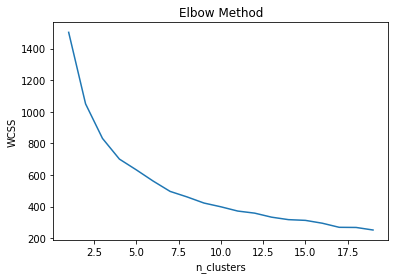

In [29]:
# Elbow Method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,20):
    model=KMeans(n_clusters=i)
    clusters=model.fit_predict(x)
    wcss.append(model.inertia_)
    
plt.plot(range(1,20),wcss)
plt.xlabel('n_clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

In [30]:
model=KMeans(n_clusters=10)
clusters=model.fit_predict(x)
df['Clusters']=clusters
df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  Clusters  
0         5.82    553         5  
1         1.65   4090         4  
2         2.89   4460         0  
3         6.16   3530         2  
4         2.13  12200         4  
..         ...    ...       ...  
162       3.50   2970         7  
163       2.47  13500         0  
164       1.95   1310         7  
165       4.67   1310         2  
166       5.40   1460         5  

[167 rows x 10 columns]

In [31]:
df.groupby('Clusters').describe().transpose()

Clusters                     0             1             2             3  \
child_mort count     25.000000     23.000000     20.000000      7.000000   
           mean      29.664000      4.295652     73.620000     10.700000   
           std       14.818004      1.065781     20.159746      2.508652   
           min       10.000000      2.600000     36.900000      8.600000   
           25%       18.100000      3.850000     62.200000      8.800000   
...                        ...           ...           ...           ...   
gdpp       min      592.000000  22500.000000    413.000000  19300.000000   
           25%     2130.000000  37350.000000    761.250000  20000.000000   
           50%     3220.000000  44500.000000   1170.000000  35000.000000   
           75%     5840.000000  49500.000000   2937.500000  36900.000000   
           max    13500.000000  87800.000000  17100.000000  70300.000000   

Clusters                     4            5              6             7  \
child_mort count     32.000000    17.000000       3.000000     27.000000   
           mean      12.553125   117.517647       4.133333     21.185185   
           std        7.046618    30.796859       2.309401     13.461818   
           min        3.200000    81.000000       2.800000      4.500000   
           25%        7.425000   101.000000       2.800000     13.800000   
...                        ...          ...            ...           ...   
gdpp       min     1630.000000   334.000000   21100.000000    786.000000   
           25%     4647.500000   459.000000   33850.000000   3270.000000   
           50%     8265.000000   595.000000   46600.000000   4340.000000   
           75%    12675.000000   758.000000   75800.000000   8040.000000   
           max    30800.000000  1460.000000  105000.000000  16600.000000   

Clusters               8            9  
child_mort count     1.0    12.000000  
           mean    130.0    74.125000  
           std       NaN    35.210074  
           min     130.0    28.100000  
           25%     130.0    53.400000  
...                  ...          ...  
gdpp       min    2330.0   231.000000  
           25%    2330.0   465.750000  
           50%    2330.0  1230.000000  
           75%    2330.0  3442.500000  
           max    2330.0  7280.000000  

[72 rows x 10 columns]